# Question 2 : Resolution analysis :

In [1]:
import numpy as np

## Hyperparameters setup

In [2]:
z=0
N=64
w0=2*np.pi 
B=np.pi/4 
zref=np.array([5,100,0])
a=20
xn=np.zeros((N,3))
# print(xn)
for n in range(N):
    xn[n][0]=-a/2+a*(n-1)/(N-1)

Text(0.5, 1.0, 'Scatter plot of x_n and zref in the z=0 place')

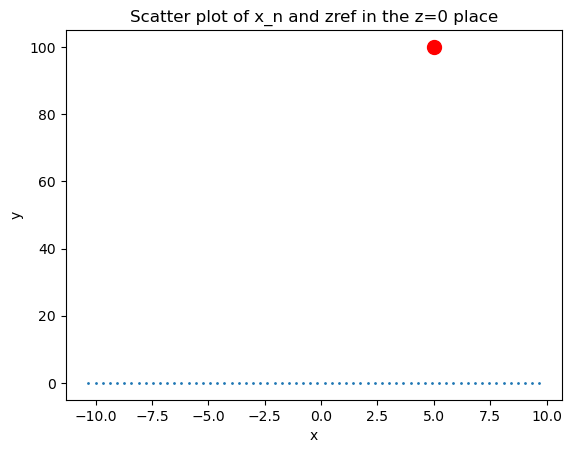

In [3]:
# Plot a two dimensional image of xn[0,1] and z_ref
import matplotlib.pyplot as plt


fig = plt.figure()
plt.scatter(xn[:,0],xn[:,1],s=1)
plt.scatter(zref[0],zref[1],s=100,c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x_n and zref in the z=0 place')

In [4]:
M=64
# discretize the frequency band
f0=w0-B
f1=w0+B
fband=np.linspace(f0,f1,M)

## Définitions des fonctions importantes

In [6]:
# 1 La green function , je ne sais pas comment elle s'écrit mais on va approximer par la partie 1 (?) 

class Green:
    def __init__(self):
        # self.c0=c0,
        # self.zref=zref
        pass 
    def __call__(self,w,x,y):
        return (1/(4*np.pi*np.linalg.norm(x-y)))*np.exp(1j*w*np.linalg.norm(x-y))

# f=Green(1,zref)
# f(0,xn[0],zref)


### Define the forward operator
### Define the forward operator

$$
[\hat{\mathbf{A}} \rho](\omega, x_r, x_s) = \int_{\Omega} \hat{G}_0(\omega, x_r, z) \rho(z) \hat{G}_0(\omega, z, x_s) \, dz.
$$
page 38
On injecte l'expression de $\rho$

In [ ]:
# On va maintenant défnir A 
class op_A: 
    def __init__(self,zref):
        self.zref=zref

    def __call__(self,rho):
        #,w,xr,xs
        def A(w,xr,xs):
            G0xr=Green()(w,xr,self.zref)
            G0xs=Green()(w,xs,self.zref)
            return rho*G0xr*G0xs
        return A
    

 The adjoint operator now : 

### Here the adjoint operator is

$$
[\hat{\mathbf{A}}^* \hat{\mathbf{v}}](y) =
\sum_{r,s=1}^{N} \int d\omega \,
\overline{\hat{G}_0(\omega, y, x_r)} \hat{G}_0(\omega, x_s, y) \hat{v}(\omega, x_r, x_s).
$$

page 39

In [ ]:
class Adjoint:
    def __init__(self,xn):
        self.xn=xn
        pass
    def __call__(self,w,v):
        def Av(y):

            somme=0
            for r in range(len(self.xn)):
                for s in range(len(self.xn)):
                    def G0xrw(w):
                        return Green()(w,y,self.xn[r])
                    def G0xsw(w):
                        return Green()(w,y,self.xn[s])
                    def vw(w):
                        return v(w,y,self.xn[r],self.xn[s])
                    # Compute the integral using numerical integration
                    integral=self.compute_integral(G0xrw,G0xsw,vw)
                    somme+= integral
            return somme
        return Av 
    def compute_integral(self,G0rw,G0xs,vw):
            # Compute the integral using numerical integration
            # Integrrate over the   frequency band fband
            integral = np.trapz(G0rw * G0xs * vw, fband) 
            return integral
